## 2do Parcial - Simulación Computacional 2020-I
Octubre 26 de 2020 - Fecha y hora de entrega: Octubre 27 de 2020 12:00 m (mediodía)

## 1. (1.0 punto)
Nombre dos tipos de topologías del entorno entre agentes .


Rta.

1. Euclideana
2. Grid o vecindario de von Neumann
3. Red o Grafo
4. SIG


## 2. (1.0 punto)
**¿Cúales de las siguiente reglas no pertenecen al juego de la vida de Conway?**

1. Cualquier célula muerta con dos o tres vecinos vivos sigue muerta a la siguiente generación.
2. Cualquier célula viva con dos o tres vecinos vivos vive a la siguiente generación.
3. Cualquier célula viva con cuatro vecinos vivos muere por falta de población.
4. Cualquier célula viva con más de tres vecinos vivos muerte por un exceso de población.
5. Cualquier célula muerta con exactamente tres vecinos vivos se convierte en una célula viva por reproducción.
6. Cualquier célula viva con menos de dos vecinos vivos muere por falta de población.

_Rta._
Las reglas 1 y 3

## 3. (1.0 punto)
Aplicando las reglas del juego de la vida de Conway para el siguiente entorno, ¿Cuál sería el estado del sistema luego de 5 iteraciones?

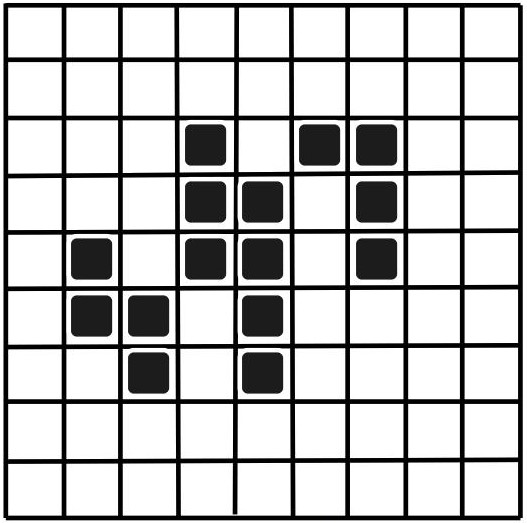

_Rta._ 
Despues de 5 iteraciones el resultado es:


 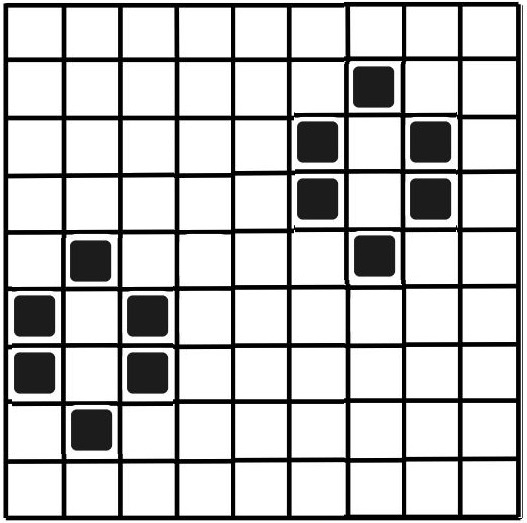


## 4. (1.0 punto)

Escriba el código en NetLogo que permita recibir por parámetro la longitud de lado para dibujar un hexagono, y  presente la captura de pantalla del resultado obtenido.


_Rta:_

    globals [n lad] ;; declaración de la variable global n

    to Ejecutar[]
      ca ;; borrar pantalla, variables, etc
      crt 1 ;; creamos la tortuga que dibujará el polígono 

      set lad (read-from-string lado)

      set n 6 ;; numero de lados del hexagono
      ;; definimos el ángulo interior del polígono
      let angulo 360 / n 

      ;; dibujamos el polígono
      ask turtles [repeat n [pd fd lad rt angulo]]
    end

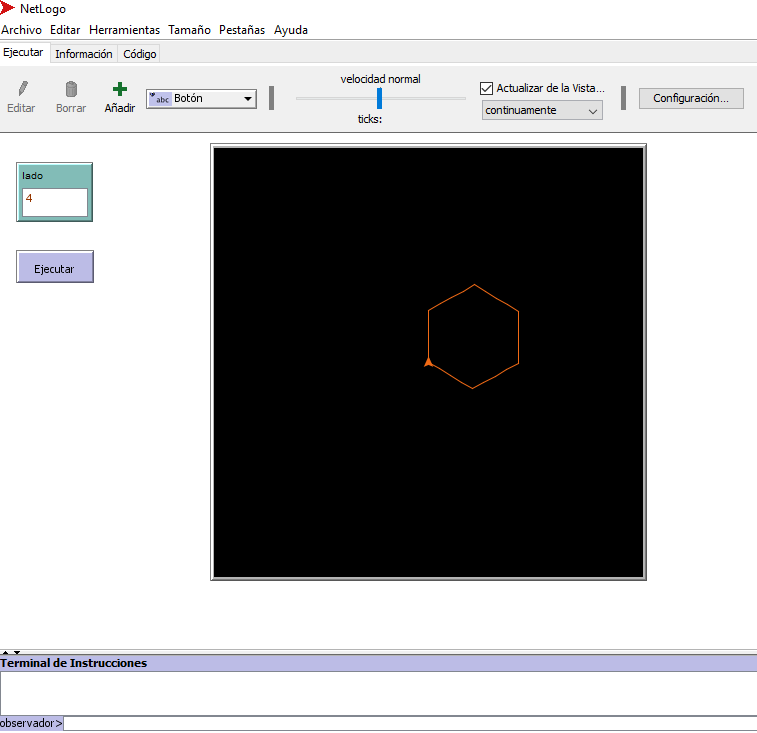


## 5. (1.0 punto)
Usando el ejemplo del modelo de simulación basada en agentes del comportamiento de hormigas para buscar comida y llevarla al nido de NetLogo en su versión online (http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Ants.nlogo), modifique el código de tal forma que:

a). La feromona dejada por las hormigas al encontrar comida en su rastro sea de 15.

b). El intervalo de la cantidad de la feromona para que una hormiga siga la dirección del rastro sea entre 0.025 y 4.

c). ¿Qué cambio en relación al modelo original respecto al comportamiento de las hormigas y su objetivo de encontrar comida y llevarla al nido?


In [ ]:
patches-own [
  chemical             ;; amount of chemical on this patch
  food                 ;; amount of food on this patch (0, 1, or 2)
  nest?                ;; true on nest patches, false elsewhere
  nest-scent           ;; number that is higher closer to the nest
  food-source-number   ;; number (1, 2, or 3) to identify the food sources
]

;;;;;;;;;;;;;;;;;;;;;;;;
;;; Setup procedures ;;;
;;;;;;;;;;;;;;;;;;;;;;;;

to setup
  clear-all
  set-default-shape turtles "bug"
  create-turtles population
  [ set size 2         ;; easier to see
    set color red  ]   ;; red = not carrying food
  setup-patches
  reset-ticks
end

to setup-patches
  ask patches
  [ setup-nest
    setup-food
    recolor-patch ]
end

to setup-nest  ;; patch procedure
  ;; set nest? variable to true inside the nest, false elsewhere
  set nest? (distancexy 0 0) < 5
  ;; spread a nest-scent over the whole world -- stronger near the nest
  set nest-scent 200 - distancexy 0 0
end

to setup-food  ;; patch procedure
  ;; setup food source one on the right
  if (distancexy (0.6 * max-pxcor) 0) < 5
  [ set food-source-number 1 ]
  ;; setup food source two on the lower-left
  if (distancexy (-0.6 * max-pxcor) (-0.6 * max-pycor)) < 5
  [ set food-source-number 2 ]
  ;; setup food source three on the upper-left
  if (distancexy (-0.8 * max-pxcor) (0.8 * max-pycor)) < 5
  [ set food-source-number 3 ]
  ;; set "food" at sources to either 1 or 2, randomly
  if food-source-number > 0
  [ set food one-of [1 2] ]
end

to recolor-patch  ;; patch procedure
  ;; give color to nest and food sources
  ifelse nest?
  [ set pcolor violet ]
  [ ifelse food > 0
    [ if food-source-number = 1 [ set pcolor cyan ]
      if food-source-number = 2 [ set pcolor sky  ]
      if food-source-number = 3 [ set pcolor blue ] ]
    ;; scale color to show chemical concentration
    [ set pcolor scale-color green chemical 0.1 5 ] ]
end

;;;;;;;;;;;;;;;;;;;;;
;;; Go procedures ;;;
;;;;;;;;;;;;;;;;;;;;;

to go  ;; forever button
  ask turtles
  [ if who >= ticks [ stop ] ;; delay initial departure
    ifelse color = red
    [ look-for-food  ]       ;; not carrying food? look for it
    [ return-to-nest ]       ;; carrying food? take it back to nest
    wiggle
    fd 1 ]
  diffuse chemical (diffusion-rate / 100)
  ask patches
  [ set chemical chemical * (100 - evaporation-rate) / 100  ;; slowly evaporate chemical
    recolor-patch ]
  tick
end

to return-to-nest  ;; turtle procedure
  ifelse nest?
  [ ;; drop food and head out again
    set color red
    rt 180 ]
  [ set chemical chemical + 15  ;; drop some chemical
    uphill-nest-scent ]         ;; head toward the greatest value of nest-scent
end

to look-for-food  ;; turtle procedure
  if food > 0
  [ set color orange + 1     ;; pick up food
    set food food - 1        ;; and reduce the food source
    rt 180                   ;; and turn around
    stop ]
  ;; go in the direction where the chemical smell is strongest
  if (chemical >= 0.025) and (chemical < 4)
  [ uphill-chemical ]
end

;; sniff left and right, and go where the strongest smell is
to uphill-chemical  ;; turtle procedure
  let scent-ahead chemical-scent-at-angle   0
  let scent-right chemical-scent-at-angle  45
  let scent-left  chemical-scent-at-angle -45
  if (scent-right > scent-ahead) or (scent-left > scent-ahead)
  [ ifelse scent-right > scent-left
    [ rt 45 ]
    [ lt 45 ] ]
end

;; sniff left and right, and go where the strongest smell is
to uphill-nest-scent  ;; turtle procedure
  let scent-ahead nest-scent-at-angle   0
  let scent-right nest-scent-at-angle  45
  let scent-left  nest-scent-at-angle -45
  if (scent-right > scent-ahead) or (scent-left > scent-ahead)
  [ ifelse scent-right > scent-left
    [ rt 45 ]
    [ lt 45 ] ]
end

to wiggle  ;; turtle procedure
  rt random 40
  lt random 40
  if not can-move? 1 [ rt 180 ]
end

to-report nest-scent-at-angle [angle]
  let p patch-right-and-ahead angle 1
  if p = nobody [ report 0 ]
  report [nest-scent] of p
end

to-report chemical-scent-at-angle [angle]
  let p patch-right-and-ahead angle 1
  if p = nobody [ report 0 ]
  report [chemical] of p
end


_Rta._

a). La feromona dejada por las hormigas al encontrar comida en su rastro sea de 15.

    
    \[ set chemical chemical + 15  ;; drop some chemical
    
    
b). El intervalo de la cantidad de la feromona para que una hormiga siga la dirección del rastro sea entre 0.025 y 4.


      ;; go in the direction where the chemical smell is strongest
      if (chemical >= 0.025) and (chemical < 4)


c). ¿Qué cambio en relación al modelo original respecto al comportamiento de las hormigas y su objetivo de encontrar comida y llevarla al nido?

*Le tomo alrededor de 700 iteraciones a las hormigas consumir las 3 fuentes de comida para llevarlas a los nidos y se evidenciaba una buena cantidad de feromona y una vez encontraban una fuente rapidamente la consumian, para la 1era 200 iteraciones, para la segunda casi 400 iteraciones y para la final casi 700 iteraciones.*
    
*Para la versión modificada, la marca dejada por el trastro de la feromona de las hormigas es mucho menor y se disipa mas rapidamente. En general le toma mucho mas consumir cada fuente de comida. Para la 1era fuente le tomo 246 iteraciones, para la 2da le tomo alrededor de 1600 iteraciones, y para la 3er fuente de comida le tomo 3800 iteraciones. Una vez algunas hormigas encontraban una fuente le tomaba mucho tiempo casi que en busquedas separadas a las demas hormigas encontrar algun rastro a la fuente de comida. Solo ocurria que al una hormiga encontrar una trozo de comida de alguna fuente, algunas hormigas la seguian al nido pero no a la fuente.*
    